## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df=pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,none,33,27,29
1,male,group B,some high school,standard,completed,56,58,58
2,male,group C,associate's degree,standard,none,66,57,56
3,female,group B,some high school,standard,completed,73,83,83
4,male,group E,some college,standard,none,75,54,60


In [3]:
df.shape

(1000, 8)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [4]:
## check missing Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Insights or Observation
There are no missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
## Check Duplicates
df.duplicated().sum()

1

In [7]:
df.mean()

math score       66.836
reading score    69.788
writing score    68.646
dtype: float64

There is a  duplicates values in the dataset

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(999, 8)

In [22]:
df.duplicated().sum() 

0

Now There are no duplicates values in the dataset

In [23]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [38]:
## 3.1 Checking the number of uniques values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     74
reading score                  71
writing score                  75
dtype: int64

In [39]:
## Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.823824,69.785786,68.636637
std,14.847893,14.695853,15.368848
min,24.000000,22.000000,14.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [40]:
## Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,none,33,27,29
1,male,group B,some high school,standard,completed,56,58,58
2,male,group C,associate's degree,standard,none,66,57,56
3,female,group B,some high school,standard,completed,73,83,83
4,male,group E,some college,standard,none,75,54,60


In [41]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group C,bachelor's degree,standard,completed,71,88,91
996,female,group C,bachelor's degree,free/reduced,completed,67,85,82
997,female,group E,high school,free/reduced,completed,60,76,76
998,male,group A,high school,standard,none,64,61,58
999,male,group B,high school,standard,completed,53,37,41


In [46]:
type(df['math score'])

pandas.core.series.Series

In [50]:
df['test preparation course'].value_counts()

none         667
completed    332
Name: test preparation course, dtype: int64

In [16]:
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [52]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [53]:
numerical_features

['math score', 'reading score', 'writing score']

In [54]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [55]:
df['gender'].value_counts()

female    519
male      480
Name: gender, dtype: int64

In [57]:
df['race/ethnicity'].value_counts()

group C    299
group D    279
group B    208
group E    143
group A     70
Name: race/ethnicity, dtype: int64

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,none,33,27,29
1,male,group B,some high school,standard,completed,56,58,58
2,male,group C,associate's degree,standard,none,66,57,56
3,female,group B,some high school,standard,completed,73,83,83
4,male,group E,some college,standard,none,75,54,60


In [60]:
## Aggregate the total score with mean

df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group C,associate's degree,standard,none,33,27,29,89,29.666667
1,male,group B,some high school,standard,completed,56,58,58,172,57.333333
2,male,group C,associate's degree,standard,none,66,57,56,179,59.666667
3,female,group B,some high school,standard,completed,73,83,83,239,79.666667
4,male,group E,some college,standard,none,75,54,60,189,63.000000


<AxesSubplot: xlabel='average', ylabel='Count'>

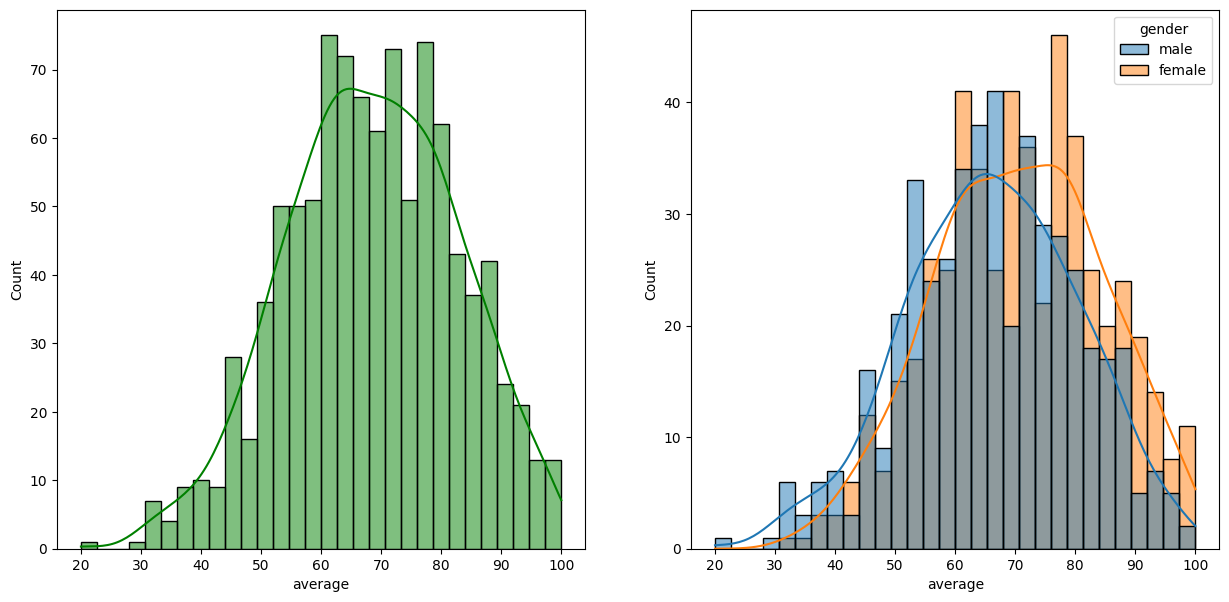

In [101]:
### Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Insights
- Female student tend to perform well than male students

<AxesSubplot: xlabel='average', ylabel='Count'>

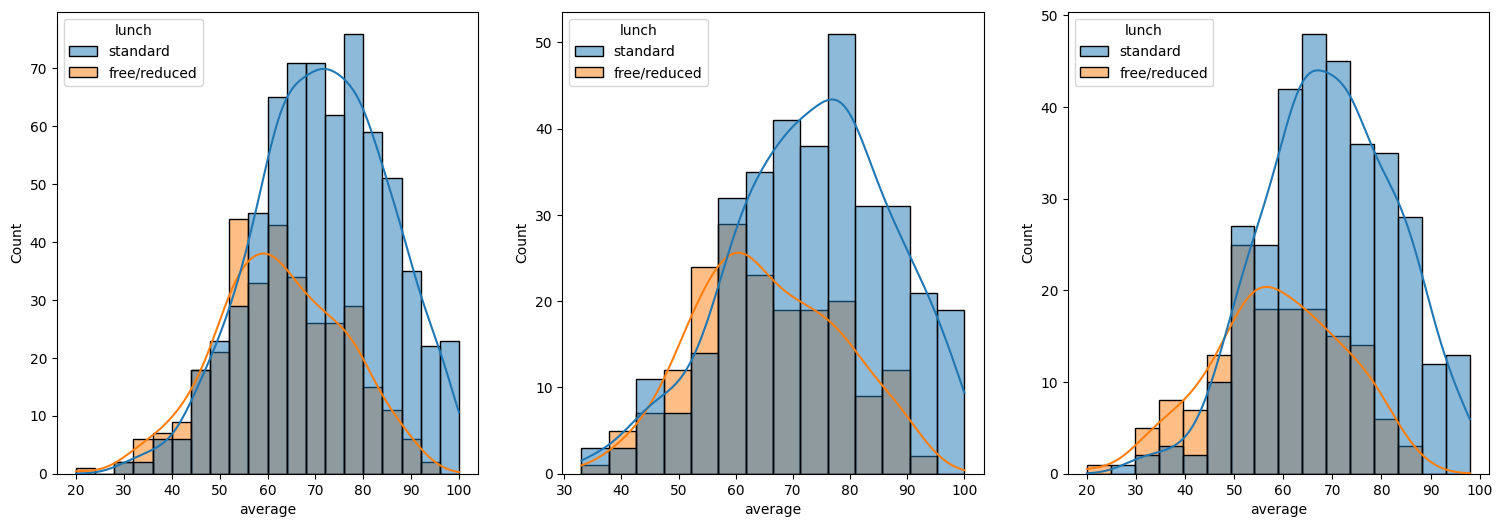

In [102]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

In [103]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group C,associate's degree,standard,none,33,27,29,89,29.666667
1,male,group B,some high school,standard,completed,56,58,58,172,57.333333
2,male,group C,associate's degree,standard,none,66,57,56,179,59.666667
3,female,group B,some high school,standard,completed,73,83,83,239,79.666667
4,male,group E,some college,standard,none,75,54,60,189,63.000000


ValueError: Could not interpret value `parental_level_of_education` for parameter `hue`

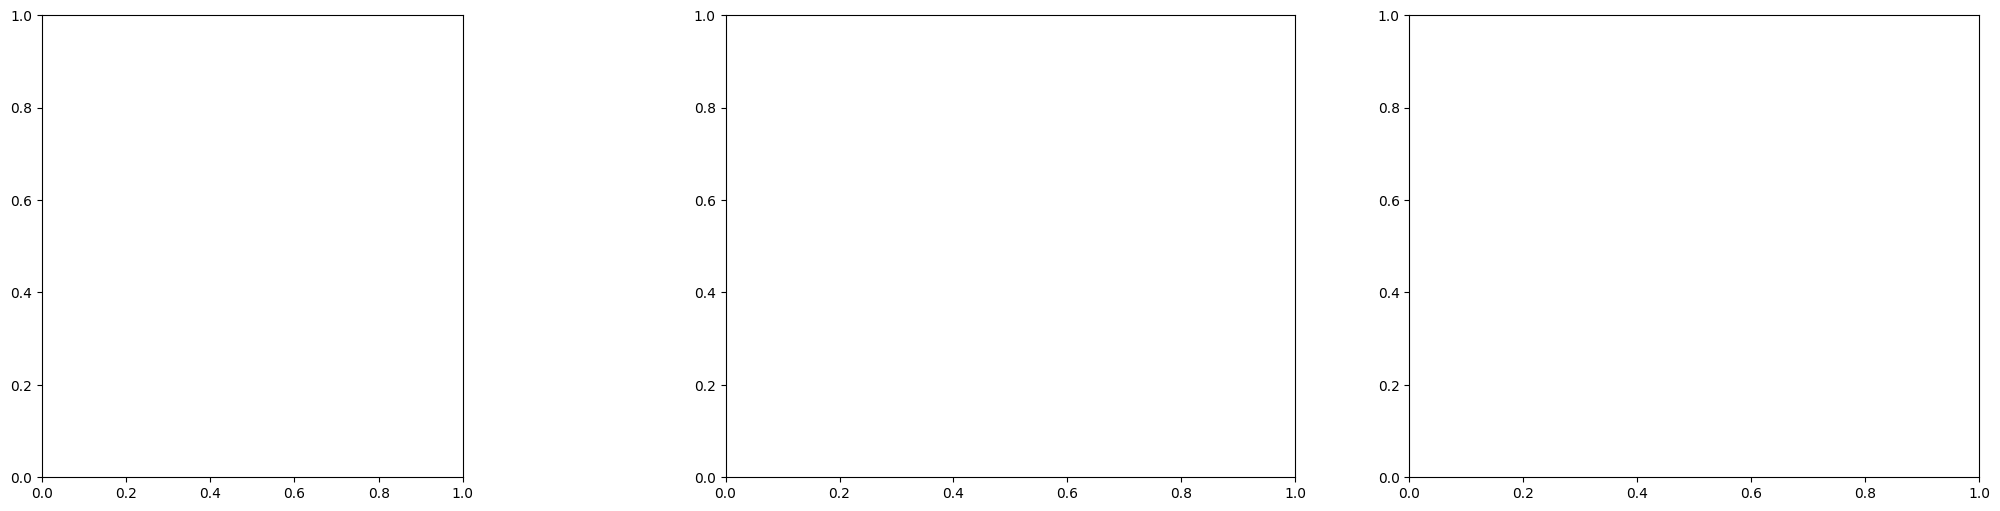

In [104]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

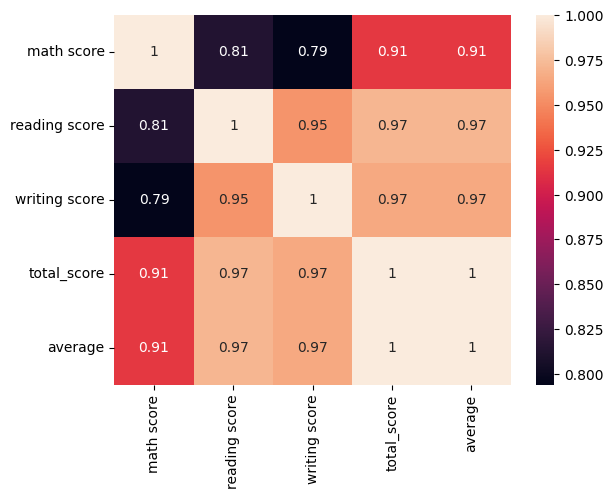

In [105]:
sns.heatmap(df.corr(),annot=True)